---
# Chapter 2: Solutions of Equations in One Variable 
---

In many applications, one needs the solution to a **nonlinear equation** for which there is no closed formula.

- Suppose you do not have a cube-root function, but only the operations $+$, $-$, $\times$, $\div$:  

$$
x^3 = a
$$

- Polynomials with degree at least five have no general algebraic solution ([Abel-Ruffini Theorem](http://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem)): 

$$
x^5 - 5x^4 + 5x^3 + 5x^2 - 6x - 1 = 0
$$

- Solution of Initial Value Problems (ODE's): Differential equation modelling the growth of the population with an imigration constant term $v$. 

$N(t)$ denotes the number in the population at time $t$ and $\lambda$ denotes the constant birth rate of the population. 

$$
 \frac{d N(t)}{dt}=  \lambda N(t) +v, \qquad N(t)=N_0e^{\lambda t}+\frac{v}{\lambda}\left(e^{\lambda t}-1\right).
$$

Suppose $N(0) = 1,000,000$ individuals initially, that $435,000$ individuals immigrate into the community in the first year, and that $N(1) = 1,564,000$ individuals are present at the end of one year. To determine the birth rate of this population, we need to find $\lambda$ in the equation

$$
1,564,000=1,000,000 \,e^{\lambda }+\frac{435,000}{\lambda}\left(e^{\lambda}-1\right).
$$

- General nonlinear equations:

$$
10\cosh(x/4) = x
\qquad \text{and} \qquad
2\cosh(x/4) = x
$$

**Note:** The **hyperbolic sine**, **hyperbolic cosine**, and **hyperbolic tangent** functions are defined as

$$
\sinh(t) = \frac{e^t - e^{-t}}{2},
\qquad
\cosh(t) = \frac{e^t + e^{-t}}{2},
\qquad
\tanh(t) = \frac{e^t - e^{-t}}{e^t + e^{-t}}.
$$

Thus $\tanh(t) = \frac{\sinh(t)}{\cosh(t)}$, $\frac{d}{dt} \sinh(t) = \cosh(t)$, and $\frac{d}{dt} \cosh(t) = \sinh(t)$.

---

## Problem statement

Given $f \in C[a,b]$ (i.e., a *continuous* function $f \colon [a,b] \to \mathbb{R}$) and we want to find $x^* \in [a, b]$ such that

$$
f(x^*) = 0.
$$

The solution $x^*$ is called a **root** or **zero** of the function $f$. There could be exactly one root, many roots, or no roots at all.

In [2]:
# Plot the above functions and their roots
using PyPlot # Package for plotting
using Roots  # Package for finding roots of functions

┌ Info: Precompiling Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1273


In [8]:
N(l) = 1000MathConstants.e^l+435(MathConstants.e^l-1)/l

N (generic function with 1 method)

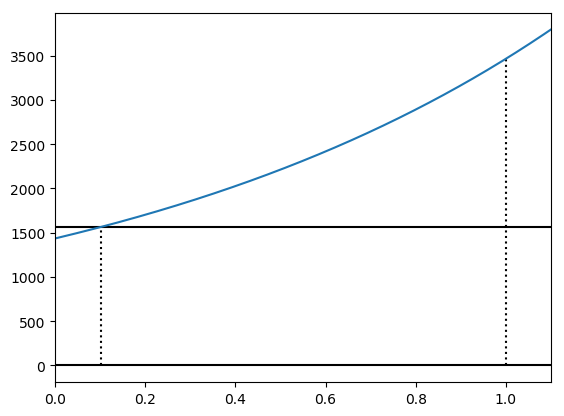

In [9]:
a, b = 0, 1.1

l = range(a, stop=b, length=1000)
plot(l, N.(l))
hlines(1564, a, b)
hlines(0, a, b)
vlines(1, 0, N(1), linestyles=":")
vlines(0.100998, 0, N(0.100998), linestyles=":")
xlim(a, b);

In [10]:
?Roots

search: Roots promote_shape promote promote_type promote_rule InsertionSort



No documentation found.

No docstring found for module `Roots`.


In [11]:
a, b = 0,1.1
r(l)= 1000MathConstants.e^l+435(MathConstants.e^l-1)/l-1564
fzeros(r, a, b)

1-element Array{Float64,1}:
 0.10099792968574967

In [12]:
p(x) = x^5 - 5x^4 + 5x^3 + 5x^2 - 6x - 1

p (generic function with 1 method)

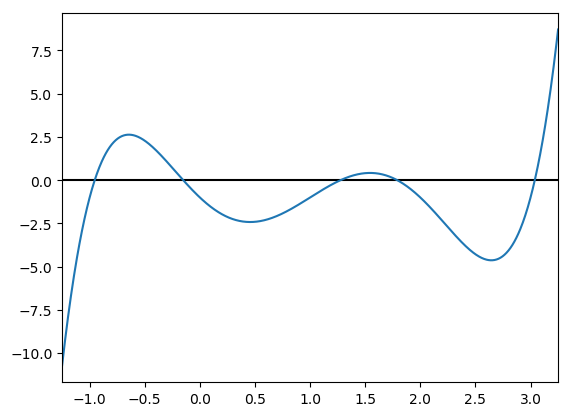

In [14]:
a, b = -1.25, 3.25

x = range(a, stop=b, length=1000)
plot(x, p.(x))
hlines(0, a, b)
xlim(a, b);

In [15]:
fzero(p, a, b)

1.2758341933170916

In [16]:
fzeros(p, a, b)

5-element Array{Float64,1}:
 -0.954079614623378  
 -0.15098417327497157
  1.2758341933170914 
  1.7907343035445205 
  3.038495291036736  

In [17]:
f(x) = 10cosh(x/4) - x

f (generic function with 1 method)

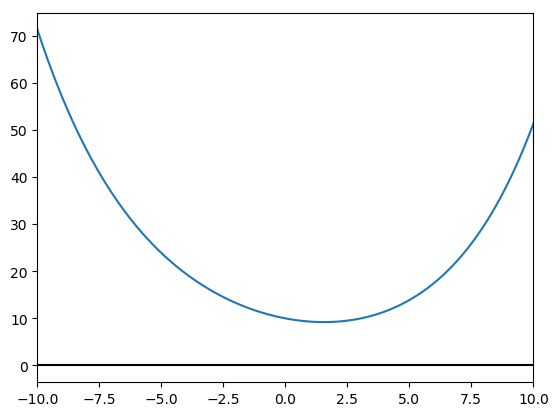

In [19]:
a, b = -10, 10

x = range(a, stop=b, length=1000)
plot(x, f.(x))
hlines(0, a, b)
xlim(a, b);

In [20]:
fzeros(f, a, b)

0-element Array{Float64,1}

In [21]:
g(x) = 2cosh(x/4) - x

g (generic function with 1 method)

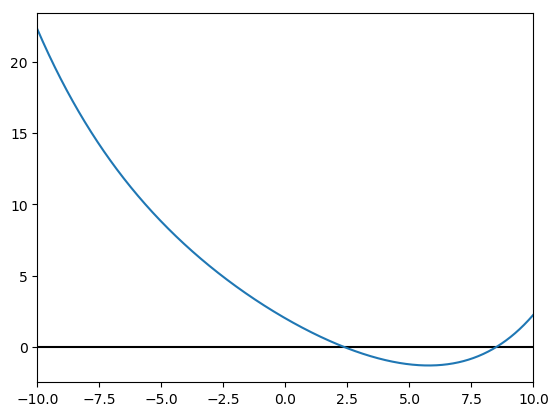

In [22]:
a, b = -10, 10

x = range(a, stop=b, length=1000)
plot(x, g.(x))
hlines(0, a, b)
xlim(a, b);

In [24]:
fzeros(g, a, b)

2-element Array{Float64,1}:
 2.357551053877402
 8.507199570713025

---

## Iterative methods

Often there is no closed formula for a root $x^*$ of the function $f$. Instead of using a formula to compute a root $x^*$, we will start with an **initial guess** $x_0$ and generate a **sequence of iterates**

$$ x_1, x_2, x_3, \ldots, x_k, \ldots $$

that we hope **converges** to $x^*$; i.e.,

$$\lim_{k \to \infty} x_k = x^*.$$

**Note:** Different initial guesses $x_0$ may generate sequences of iterates that converge to different roots. We will see how to deal with this issue.

---

## When to stop

Since the sequence of iterates is infinite, we must decide when we are close enough to a root $x^*$. However, we do not know $x^*$, so how can we decide when we are close enough?

Some options are to stop when:

1. The function value is small:

  $$\left|f(x_k)\right| < \mathtt{ftol}.$$
  
  A problem with this test is that $\left|f(x_k)\right|$ may be very small although $x_k$ is still very far from a root.
    
2. Consecutive iterates are very close to each other:

   $$\left|x_k - x_{k-1}\right| < \mathtt{atol}.$$
   
   A problem with this test is that `atol` must take into account the magnitude of the iterates.

3. Consecutive iterates are *relatively* close to each other:

   $$\left|x_k - x_{k-1}\right| < \mathtt{rtol} \left|x_k\right|.$$
   
   Usually this is more robust than the above absolute test.
  

---